**📦 Step 1: Setup**

In [1]:
# Installing necessary libraries
!pip install tensorflow

**✅ Import required libraries**

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import io
from PIL import Image
import ipywidgets as widgets

**📥 Step 2: Load Pre-trained MobileNet Model**

MobileNet is a lightweight convolutional neural network designed for mobile and embedded devices. It’s trained on ImageNet (1.4M images, 1000 classes).

In [33]:
# Load MobileNet model with pretrained ImageNet weights
model = MobileNet(weights='imagenet')

**🖼️ Step 3: Upload and Preprocess Image**

Loading an image as a dataset, MobileNet expects:
* Shape: (224, 224, 3)
* Pixel values: Normalized to [-1, 1]

In [39]:
# Image path 
img_path = '/kaggle/input/flowers/tulips.jpg'  # <-- update this with your file path

After uploading, process the image:

In [40]:
# Load and preprocess
def preprocess_image(path):
    img = Image.open(path).resize((224, 224)).convert('RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

**🧠 Step 4: Predict the Class**

In [41]:
# Predict
def predict_image_class(img_array):
    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=1)[0][0]
    return f"Prediction: {decoded[1]} ({decoded[2]*100:.2f}%)"

**💻 Step 5: Display Prediction in Aesthetic HTML Interface**

In [42]:
def show_prediction_result(label):
    html_content = f"""
    <div style="
        background: linear-gradient(135deg, #6e7cdb, #4a90e2);
        padding: 30px;
        border-radius: 20px;
        box-shadow: 0 4px 10px rgba(0,0,0,0.1);
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
        max-width: 600px;
        margin: auto;
        font-size: 18px;">
        
        <h2 style="
            color: #fff;
            font-size: 32px;
            font-weight: bold;
            margin-bottom: 20px;">
            Image Classification Result
        </h2>
        
        <p style="
            color: #fff;
            font-size: 24px;
            line-height: 1.5;
            font-weight: 600;
            margin: 0;
            background-color: rgba(255, 255, 255, 0.3);
            padding: 15px;
            border-radius: 12px;">
            {label}
        </p>
        
        <div style="
            margin-top: 20px;
            display: flex;
            justify-content: center;
            gap: 20px;">
            
            <button style="
                background-color: #ff7f50;
                color: white;
                border: none;
                padding: 12px 25px;
                font-size: 16px;
                border-radius: 8px;
                cursor: pointer;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                transition: background-color 0.3s ease;">
                Try Again
            </button>

            <button style="
                background-color: #32cd32;
                color: white;
                border: none;
                padding: 12px 25px;
                font-size: 16px;
                border-radius: 8px;
                cursor: pointer;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                transition: background-color 0.3s ease;">
                View Another
            </button>
        </div>
    </div>
    """
    display(HTML(html_content))

**▶️ Step 6: Run the Full Pipeline**

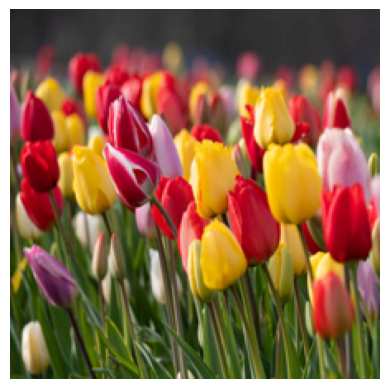

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [43]:
img_array = preprocess_image(img_path)
label = predict_image_class(img_array)
show_prediction_result(label)